# **Cartpole**

In [13]:
from stable_baselines3 import PPO, DQN, A2C
import gymnasium as gym
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
tmp_path = "./results/"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = A2C(policy = "MlpPolicy", env = env, device='cpu')

model.set_logger(new_logger)
model.learn(total_timesteps=100_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 37.8     |
|    ep_rew_mean        | 37.8     |
| time/                 |          |
|    fps                | 711      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.515   |
|    explained_variance | -0.84    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.705    |
|    value_loss         | 30.8     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 26.2     |
|    ep_rew_mean        | 26.2     |
| time/                 |          |
|    fps                | 756      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/        

In [15]:
env = gym.make("CartPole-v1", render_mode='human')
(obs,_) = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

ValueError: You have passed a tuple to the predict() function instead of a Numpy array or a Dict. You are probably mixing Gym API with SB3 VecEnv API: `obs, info = env.reset()` (Gym) vs `obs = vec_env.reset()` (SB3 VecEnv). See related issue https://github.com/DLR-RM/stable-baselines3/issues/1694 and documentation for more information: https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html#vecenv-api-vs-gym-api

In [16]:
model.save("/model/A2C_CartPole")

/home/joaolucasmbc/mambaforge/envs/rl/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:284: UserWarning: Path '/model' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


PermissionError: [Errno 13] Permission denied: '/model'

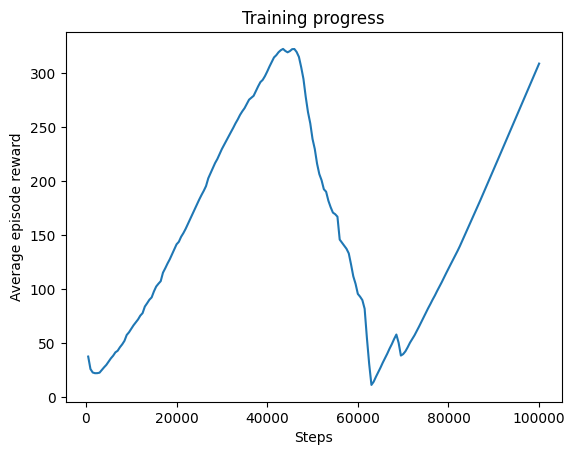

In [20]:
df = pd.read_csv("results/progress.csv")

df.head()

plt.plot(df['time/total_timesteps'], df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('Training progress')
plt.show()